In [7]:
import sys
sys.path.append('../../')

import numpy as np

from helper import *

In [8]:
class minibatch:
    def mse_loss(self, x):
        y_pred = np.dot(self.X, x[0])
        mse = np.mean((self.y - y_pred) ** 2)
        return mse

    def mse_loss_grad(self, x):
        # Choose n random data points from the training set without replacement
        indices = np.random.choice(self.X.shape[0], self.batch_size, replace=False)
        X_batch = self.X[indices, :]
        y_batch = self.y[indices]

        # Compute the gradient of the MSE loss with respect to x for the chosen data points
        y_pred = np.dot(X_batch, x)
        grad = 2 * np.dot(X_batch.T, (y_pred - y_batch))

        # Sum values in rows of grad and divide by n
        grad_mean = np.sum(grad, axis=1) / self.batch_size

        return grad_mean
    
    def __init__(self, X, y, batch_size=2, method='mse'):
        self.X = X
        self.y = y
        self.batch_size = batch_size

        if self.batch_size > X.shape[0]:
            self.batch_size = X.shape[0]

        if method == 'mse':
            self.f = self.mse_loss 
            self.grad = self.mse_loss_grad
        else:
            print('method not found')
        

    def constant_lr_scheduling(epoch, initial_lr):
        return initial_lr

    def gradient_descent(self, x0, lr_scheduling_func=constant_lr_scheduling, initial_lr=0.001, max_epochs=1000, eps=1e-5, eps_RMSProp=1e-5, minimum = 0.0, apply_min=False, apply_value=True):
        """
        Cтохастический градиентный спуск для поиска минимума функции.

        Аргументы:
            x0 (list): Начальную точка, с которой начинается поиск.
            initial_lr (float): learning_rate - Начальная скорость обучения или шаг градиентного спуска.
            max_epochs (int): Максимальное количество эпох или итераций для выполнения алгоритма.
            minimum (float): Минимум функции.
            epsilon (float): Малое число, используемое как критерий останова для алгоритма.
        Возвращает:
            Список всех точек, посещенных во время алгоритма.
        """
        return custom_gradient_descent_with_lr_scheduling_and_RMSProp(self.f, self.grad, x0, lr_scheduling_func, initial_lr, max_epochs, eps, eps_RMSProp, minimum, apply_min, apply_value)
    
    def get_loss_history(self, results):
        loss_history = []

        for i in range(len(results)):
            loss_history.append(self.f(results[i]))

        return loss_history
    


In [9]:
# Генерируем случайные точки
real_weight, real_bias = 2, 0

dots_count = 500
variance = 0.5
X = np.random.rand(dots_count, 1)
y = real_weight * X + real_bias + (np.random.rand(dots_count, 1) * variance - variance / 2)

sgd = minibatch(X, y, batch_size=500)
loss_real = sgd.get_loss_history([[real_weight]])[-1]

results = sgd.gradient_descent(np.array([0], float), max_epochs=10000, initial_lr=1e-1, eps=loss_real+(loss_real*1e-1), eps_RMSProp=1e-8, apply_min=True, apply_value=True)

Коэффициенты уравнения прямой:
y = 2.000 * x + 0.000
Вычисленные коэффициенты уравнения прямой RMSProp:
y = 1.936 * x + 0.000


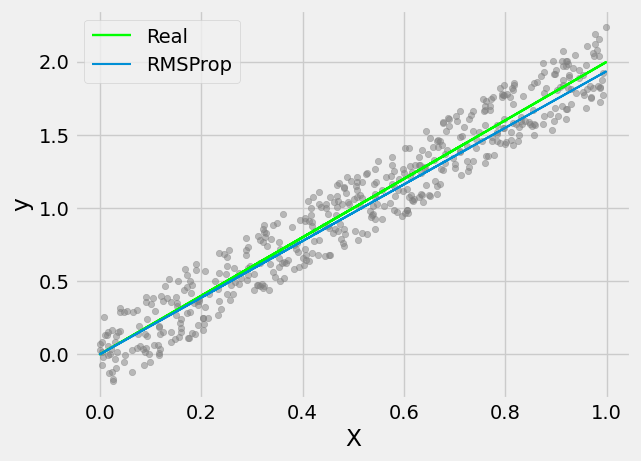

In [10]:
print("Коэффициенты уравнения прямой:")
print(f"y = {real_weight:.3f} * x + {real_bias:.3f}")

plt.scatter(X, y, color='gray', alpha=0.5, s=20.8)
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X, real_weight * X + real_bias, label='Real', color='lime', linewidth=1.7)

plt.plot(X, results[-1][0] * X + real_bias, label='RMSProp', linewidth=1.5)
print("Вычисленные коэффициенты уравнения прямой RMSProp:")
print(f"y = {results[-1][0]:.3f} * x + {real_bias:.3f}")

plt.legend()
plt.show()

[1.3820969767605233, 0.9855511615844512, 0.7547317039873169, 0.5924203629532044, 0.4695766212460639, 0.37309228235605457, 0.2957697435891763, 0.23316081884427703, 0.1822854850132361, 0.1410246271017592, 0.10779931294498402, 0.08138733870982141, 0.06081167679539565, 0.04526930431113079, 0.034084024943532125, 0.026674234772172487, 0.022530380917612027]
Значение функции потерь:
real = 0.021198536725356824
RMSProp = 0.022530380917612027
diff = 0.0013318441922552035



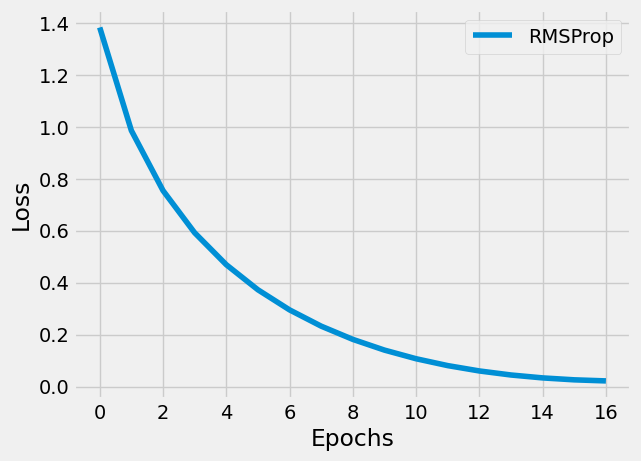

In [11]:
loss_history = sgd.get_loss_history(results)
loss_real = sgd.get_loss_history([[real_weight]])[-1]

print(loss_history)

plt.plot(loss_history, label="RMSProp")
print("Значение функции потерь:")
print(f"real = {loss_real}")
print(f"RMSProp = {loss_history[-1]}")
print(f"diff = {loss_history[-1] - loss_real}\n")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()